In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


       Original Energy (kWh)  Minimized Energy (kWh)  Energy Reduction (%)
count             700.000000              700.000000            700.000000
mean               -0.044714               -0.044782             -0.151844
std                 0.000518                0.000515              0.012270
min                -0.048712               -0.048780             -0.176001
25%                -0.045004               -0.045071             -0.157256
50%                -0.044593               -0.044663             -0.152062
75%                -0.044320               -0.044389             -0.147252
max                -0.043843               -0.043919             -0.000255


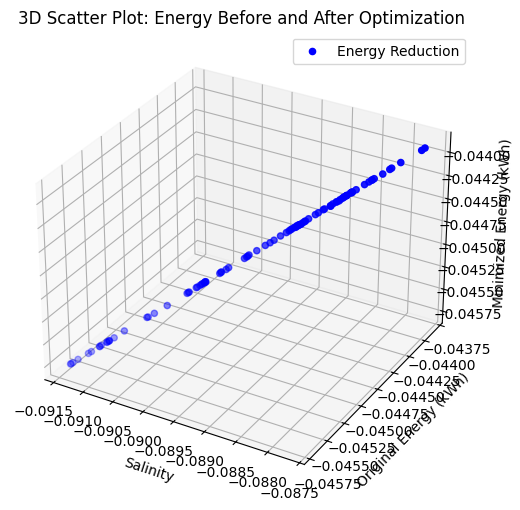

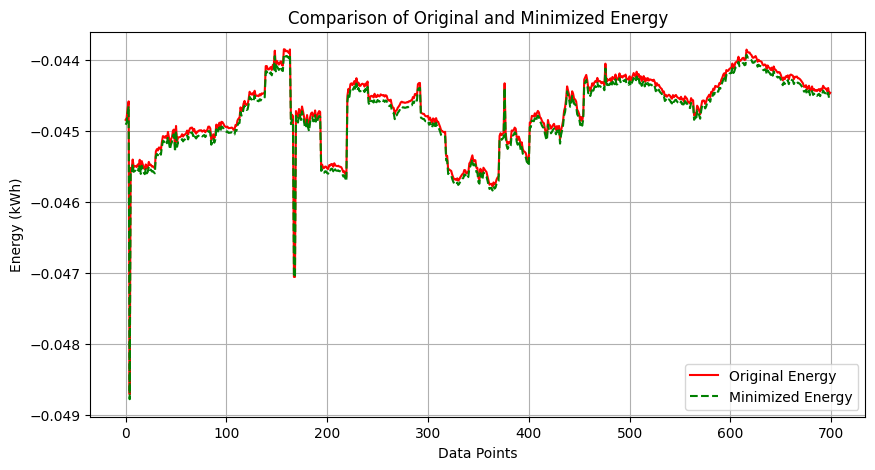

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

file_path = "/content/drive/MyDrive/RM/RM_dataset.xlsx"
xls = pd.ExcelFile(file_path)

df = xls.parse("Sheet1")

def calculate_salinity(conductivity, temperature):
    conductivity_mS = conductivity / 1000

    salinity = 0.008 * conductivity_mS + 0.0005 * temperature - 0.1
    return salinity

df["Salinity"] = df.apply(lambda row: calculate_salinity(row["Conductivity"], row["Temperature"]), axis=1)

k = 0.5  

df["Original Energy (kWh)"] = k * df["Salinity"]

reduction_factor = 0.95

df["Optimized Salinity"] = df.apply(lambda row: calculate_salinity(row["Conductivity"] * reduction_factor, row["Temperature"]), axis=1)

df["Minimized Energy (kWh)"] = k * df["Optimized Salinity"]

df["Energy Reduction (%)"] = ((df["Original Energy (kWh)"] - df["Minimized Energy (kWh)"]) / df["Original Energy (kWh)"]) * 100

print(df[["Original Energy (kWh)", "Minimized Energy (kWh)", "Energy Reduction (%)"]].describe())
df_sample = df.sample(100, random_state=42)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_sample["Salinity"], df_sample["Original Energy (kWh)"], df_sample["Minimized Energy (kWh)"],
           c='b', marker='o', label="Energy Reduction")

ax.set_xlabel("Salinity")
ax.set_ylabel("Original Energy (kWh)")
ax.set_zlabel("Minimized Energy (kWh)")
ax.set_title("3D Scatter Plot: Energy Before and After Optimization")
ax.legend()

plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Original Energy (kWh)"], label="Original Energy", color="red", linestyle="-")
plt.plot(df.index, df["Minimized Energy (kWh)"], label="Minimized Energy", color="green", linestyle="--")

plt.xlabel("Data Points")
plt.ylabel("Energy (kWh)")
plt.title("Comparison of Original and Minimized Energy")
plt.legend()
plt.grid(True)

plt.show()


       Original Energy (kWh)  Minimized Energy (kWh)  Energy Reduction (%)
count             700.000000              700.000000            700.000000
mean               -0.044714               -0.044918             -0.455532
std                 0.000518                0.000508              0.036811
min                -0.048712               -0.048917             -0.528002
25%                -0.045004               -0.045204             -0.471769
50%                -0.044593               -0.044803             -0.456187
75%                -0.044320               -0.044530             -0.441757
max                -0.043843               -0.044065             -0.000765


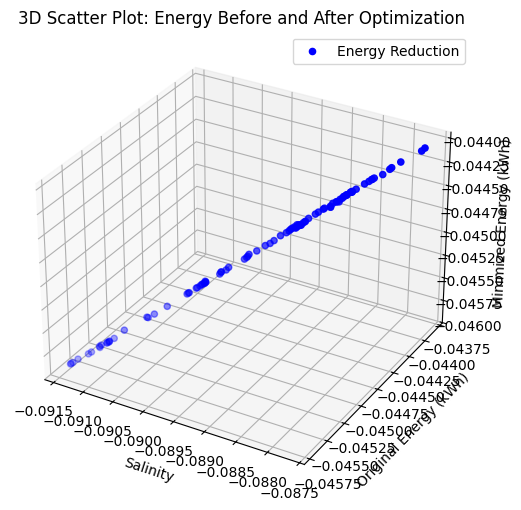

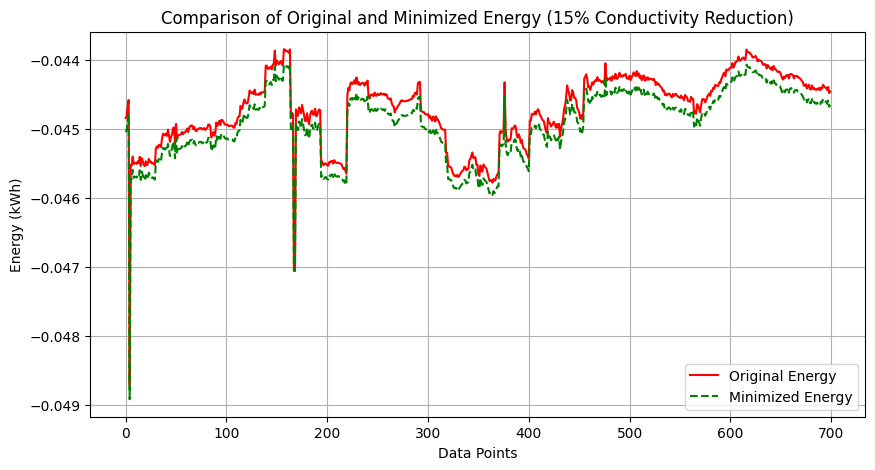

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

file_path = "/content/drive/MyDrive/RM/RM_dataset.xlsx"
xls = pd.ExcelFile(file_path)

df = xls.parse("Sheet1")
def calculate_salinity(conductivity, temperature):
    conductivity_mS = conductivity / 1000

    salinity = 0.008 * conductivity_mS + 0.0005 * temperature - 0.1
    return salinity
df["Salinity"] = df.apply(lambda row: calculate_salinity(row["Conductivity"], row["Temperature"]), axis=1)
k = 0.5  

df["Original Energy (kWh)"] = k * df["Salinity"]

reduction_factor = 0.85  

df["Optimized Salinity"] = df.apply(lambda row: calculate_salinity(row["Conductivity"] * reduction_factor, row["Temperature"]), axis=1)
df["Minimized Energy (kWh)"] = k * df["Optimized Salinity"]

df["Energy Reduction (%)"] = ((df["Original Energy (kWh)"] - df["Minimized Energy (kWh)"]) / df["Original Energy (kWh)"]) * 100

print(df[["Original Energy (kWh)", "Minimized Energy (kWh)", "Energy Reduction (%)"]].describe())

df_sample = df.sample(100, random_state=42)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_sample["Salinity"], df_sample["Original Energy (kWh)"], df_sample["Minimized Energy (kWh)"],
           c='b', marker='o', label="Energy Reduction")

ax.set_xlabel("Salinity")
ax.set_ylabel("Original Energy (kWh)")
ax.set_zlabel("Minimized Energy (kWh)")
ax.set_title("3D Scatter Plot: Energy Before and After Optimization")
ax.legend()

plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Original Energy (kWh)"], label="Original Energy", color="red", linestyle="-")
plt.plot(df.index, df["Minimized Energy (kWh)"], label="Minimized Energy", color="green", linestyle="--")

plt.xlabel("Data Points")
plt.ylabel("Energy (kWh)")
plt.title("Comparison of Original and Minimized Energy (15% Conductivity Reduction)")
plt.legend()
plt.grid(True)

plt.show()


       Original Energy (kWh)  Minimized Energy (kWh)  Energy Reduction (%)
count             700.000000              700.000000            700.000000
mean                0.416913                0.322141             22.636436
std                 0.040132                0.028519              1.326392
min                 0.099859                0.099873             -0.013930
25%                 0.398670                0.309132             22.461907
50%                 0.417791                0.322753             22.747333
75%                 0.434508                0.334657             22.979475
max                 0.516089                0.392874             23.874689


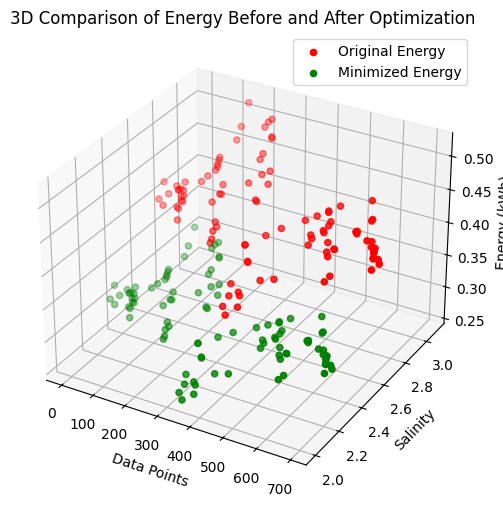

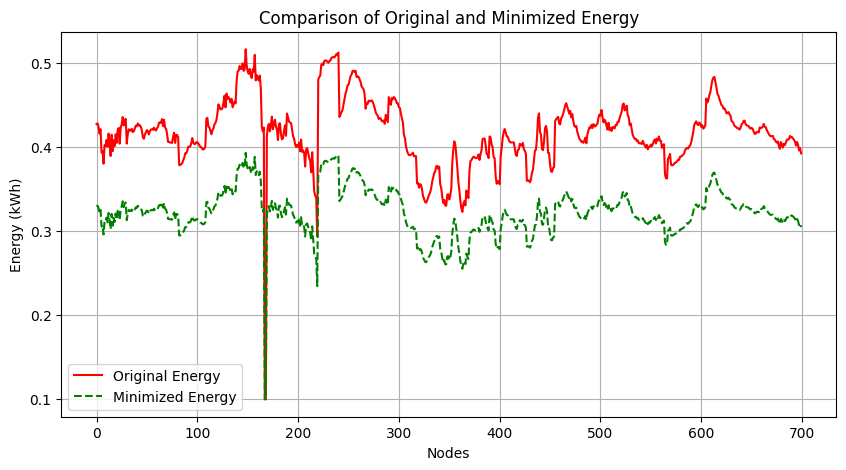

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

file_path = "/content/drive/MyDrive/RM/RM_dataset.xlsx"
xls = pd.ExcelFile(file_path)

df = xls.parse("Sheet1")

A = 0.008  
B = 0.0005  

df["Salinity"] = A * df["Conductivity"] + B * df["Temperature"]

df["Reduced Conductivity"] = df["Conductivity"] * 0.85

df["Minimized Salinity"] = A * df["Reduced Conductivity"] + B * df["Temperature"]

def calculate_energy(salinity):
    return 0.05 * salinity**2 - 0.02 * salinity + 0.1  

df["Original Energy (kWh)"] = calculate_energy(df["Salinity"])
df["Minimized Energy (kWh)"] = calculate_energy(df["Minimized Salinity"])

df["Energy Reduction (%)"] = ((df["Original Energy (kWh)"] - df["Minimized Energy (kWh)"]) / df["Original Energy (kWh)"]) * 100

print(df[["Original Energy (kWh)", "Minimized Energy (kWh)", "Energy Reduction (%)"]].describe())
df_sample = df.sample(100, random_state=42)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_sample.index, df_sample["Salinity"], df_sample["Original Energy (kWh)"], color='r', label="Original Energy")
ax.scatter(df_sample.index, df_sample["Minimized Salinity"], df_sample["Minimized Energy (kWh)"], color='g', label="Minimized Energy")

ax.set_xlabel("Data Points")
ax.set_ylabel("Salinity")
ax.set_zlabel("Energy (kWh)")
ax.set_title("3D Comparison of Energy Before and After Optimization")
ax.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Original Energy (kWh)"], label="Original Energy", color="red", linestyle="-")
plt.plot(df.index, df["Minimized Energy (kWh)"], label="Minimized Energy", color="green", linestyle="--")

plt.xlabel("Nodes")
plt.ylabel("Energy (kWh)")
plt.title("Comparison of Original and Minimized Energy")
plt.legend()
plt.grid(True)
plt.show()


Optimized Sensor Node Positions: [-3.33051318e-05 -1.93825710e-05]


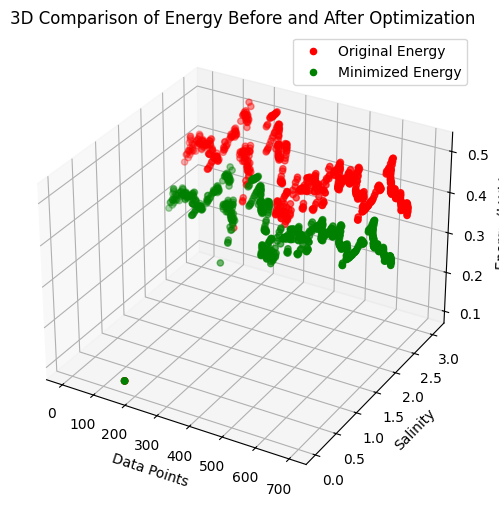

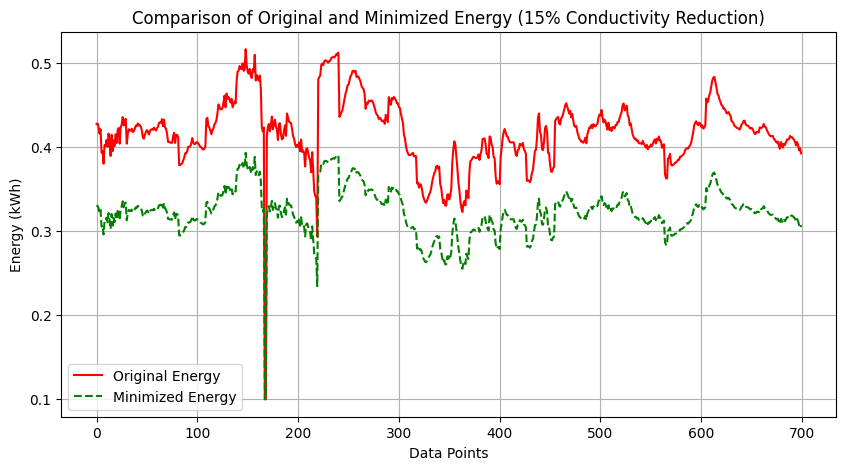

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

file_path = "/content/drive/MyDrive/RM/RM_dataset.xlsx"
xls = pd.ExcelFile(file_path)
df = xls.parse("Sheet1")

A = 0.008  
B = 0.0005  

df["Salinity"] = A * df["Conductivity"] + B * df["Temperature"]

df["Reduced Conductivity"] = df["Conductivity"] * 0.85

df["Minimized Salinity"] = A * df["Reduced Conductivity"] + B * df["Temperature"]

def calculate_energy(salinity):
    return 0.05 * salinity**2 - 0.02 * salinity + 0.1  

df["Original Energy (kWh)"] = calculate_energy(df["Salinity"])
df["Minimized Energy (kWh)"] = calculate_energy(df["Minimized Salinity"])

def energy_cost(node_positions, salinity, temperature):
    """
    Objective function: Minimize energy cost based on node positions and environmental factors.
    """
    node_x, node_y = node_positions
    adjusted_energy = (0.05 * salinity**2 - 0.02 * salinity + 0.1) + (0.001 * node_x**2 + 0.001 * node_y**2)
    return adjusted_energy

initial_positions = np.array([5, 5])  

result = minimize(
    energy_cost,
    initial_positions,
    args=(df["Salinity"].mean(), df["Temperature"].mean()),
    method='Nelder-Mead'  
)

optimized_positions = result.x
print(f"Optimized Sensor Node Positions: {optimized_positions}")

df["Energy Reduction (%)"] = ((df["Original Energy (kWh)"] - df["Minimized Energy (kWh)"]) / df["Original Energy (kWh)"]) * 100

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df.index, df["Salinity"], df["Original Energy (kWh)"], color='r', label="Original Energy")
ax.scatter(df.index, df["Minimized Salinity"], df["Minimized Energy (kWh)"], color='g', label="Minimized Energy")

ax.set_xlabel("Data Points")
ax.set_ylabel("Salinity")
ax.set_zlabel("Energy (kWh)")
ax.set_title("3D Comparison of Energy Before and After Optimization")
ax.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Original Energy (kWh)"], label="Original Energy", color="red", linestyle="-")
plt.plot(df.index, df["Minimized Energy (kWh)"], label="Minimized Energy", color="green", linestyle="--")

plt.xlabel("Data Points")
plt.ylabel("Energy (kWh)")
plt.title("Comparison of Original and Minimized Energy (15% Conductivity Reduction)")
plt.legend()
plt.grid(True)
plt.show()
